<a href="https://colab.research.google.com/github/hebaismail6848/Machine-Deep-learning-projects/blob/main/Parkinson_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##What is Parkinson's disease?

<img src = https://dmphysio.com.au/wp-content/uploads/2020/10/parkinson-disease-symptoms-infographic-idea-dementia-neurology-illness-tremor-memory-loss-isolated-vector-illustration-161160294.jpg width = "700" height = "500" >


> ***Parkinson's Disease*** is a chronic and progressive neurological disorder that results from degeneration of dopamine-producing cells in a part of the brain called the substantia nigra. Dopamine is a neurotransmitter responsible for transmitting signals that regulate movement and coordination.
PD primarily affects the movement of the body, leading to a range of symptoms such as:

> PD primarily affects the movement of the body, leading to a range of motor symptoms such as:
>> *   Resting Tremors
>> *   Slowness of movement
>> *   Stiffness (Freezing of gait)
>> *   Impaired balance and coordination

> Symptoms usually begin gradually and worsen over time. As the disease progresses, people may have difficulty walking and talking. They may also have mental and behavioral changes, sleep problems, depression, memory difficulties, and fatigue.

> There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range).

> There is no definitive test to diagnose PD, healthcare professionals rely on medical history, clinical evaluation, and specialized tests to diagnose PD.
That's why it's often challenging and may take time to accurately confirm the condition.
##Objective of this notebook:
>> Eventhough there is no cure for PD, early detection along with proper medication can significantly improve symptoms and quality of life, but current diagnostic methods can be time-consuming, expensive, and subjective. Machine learning algorithms can quickly and accurately analyze large amounts of audio data, improving the efficiency and accuracy of PD diagnosis. In this notebook, we use vocal features extracted from audio recordings to classify patients with Parkinson's disease using different Machine Learning techniques.



## Features used

| Feature/s     | Description |
| ----------- | ----------- |
| name    | ASCII subject name and recording number         |
| MDVP:Fo(Hz)   | Average fundamental frequency        |
| MDVP:Fhi(Hz)   | Maximum fundamental frequency        |
| MDVP:Flo(Hz)   | Minimum fundamental frequency        |
| Jitter(%), Jitter(Abs), RAP, PQ, Jitter:DDP   | Several measures of variation in fundamental frequency |
| Shimmer, Shimmer(dB),Shimmer:APQ3, Shimmer:APQ5, APQ, Shimmer:DDA   | Several measures of variation in amplitude        |
| NHR, HNR    | Two measures of ratio of noise to tonal components in the voice        |
| status   | Health status: (1) -> Parkinson's,  (0) -> healthy        |
| RPDE,D2   | Two nonlinear dynamical complexity measures        |
| DFA   | Signal fractal scaling exponent        |
| spread1,spread2,PPE   | nonlinear measures of fundamental frequency variation        |

# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read and Explore data

In [ ]:
parkinson = pd.read_csv('/content/drive/MyDrive/Parkinsson disease vocal.csv')
pd.set_option('display.max_columns', None)

In [ ]:
parkinson.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
parkinson.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

We can see that all features are numerical except for name and status

In [ ]:
parkinson.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


#### Check for duplicated rows

In [ ]:
sum(parkinson.duplicated())

0

In [ ]:
parkinson.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

## Feature Engineering

In [ ]:
# Moving the target column to the end
parkinson.insert(len(parkinson.columns)-1, 'status', parkinson.pop('status'))
# Removing the name column
parkinson.drop('name', axis = 1, inplace = True)
parkinson.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


In [ ]:
parkinson.shape

(195, 23)

# Checking the Distribution of the data

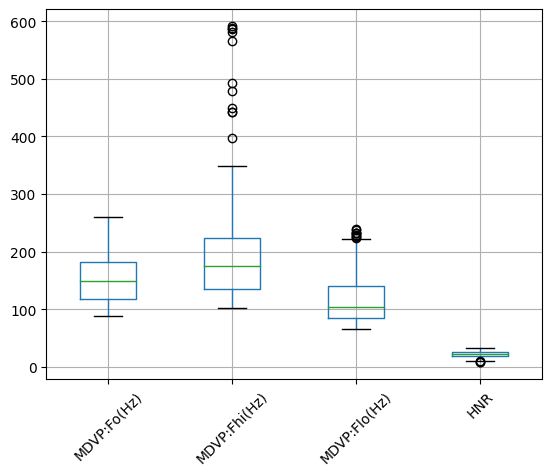

In [ ]:
parkinson[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)','HNR']].boxplot()
plt.xticks(rotation = 45)
plt.show()

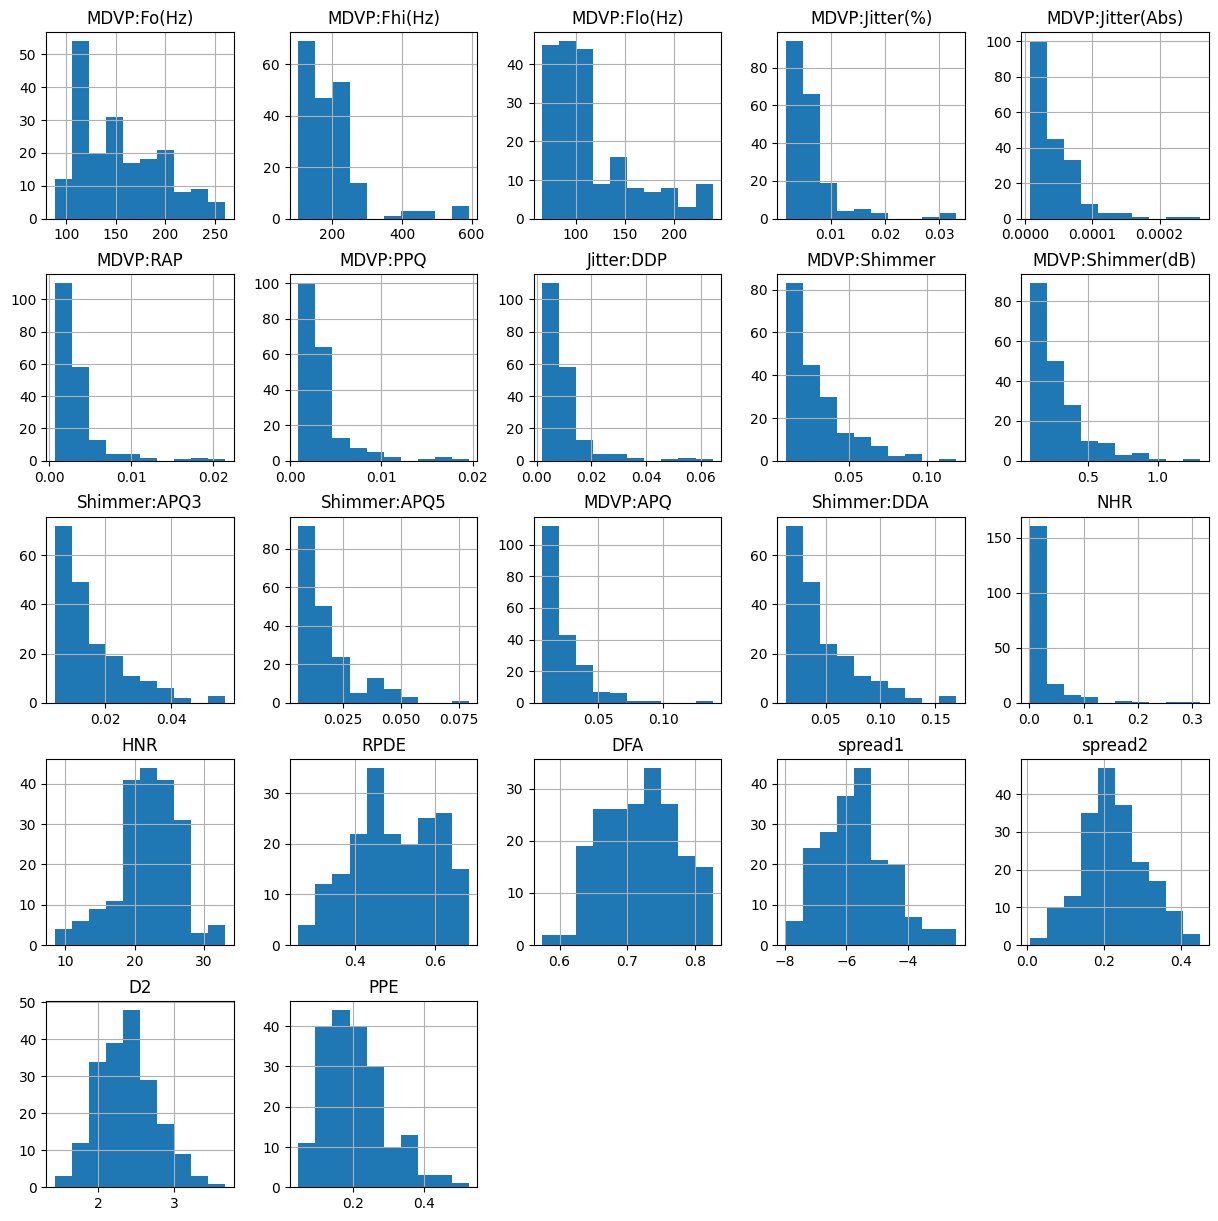

In [ ]:
parkinson.iloc[:,:-1].hist(figsize=(15,15))
plt.show()

**We can see the data has many outliers and the first 15 columns are right skewed**

In [ ]:
# Applying log transformation on the right skewed data
parkinson.iloc[:,:15] = np.log10(parkinson.iloc[:,:15])

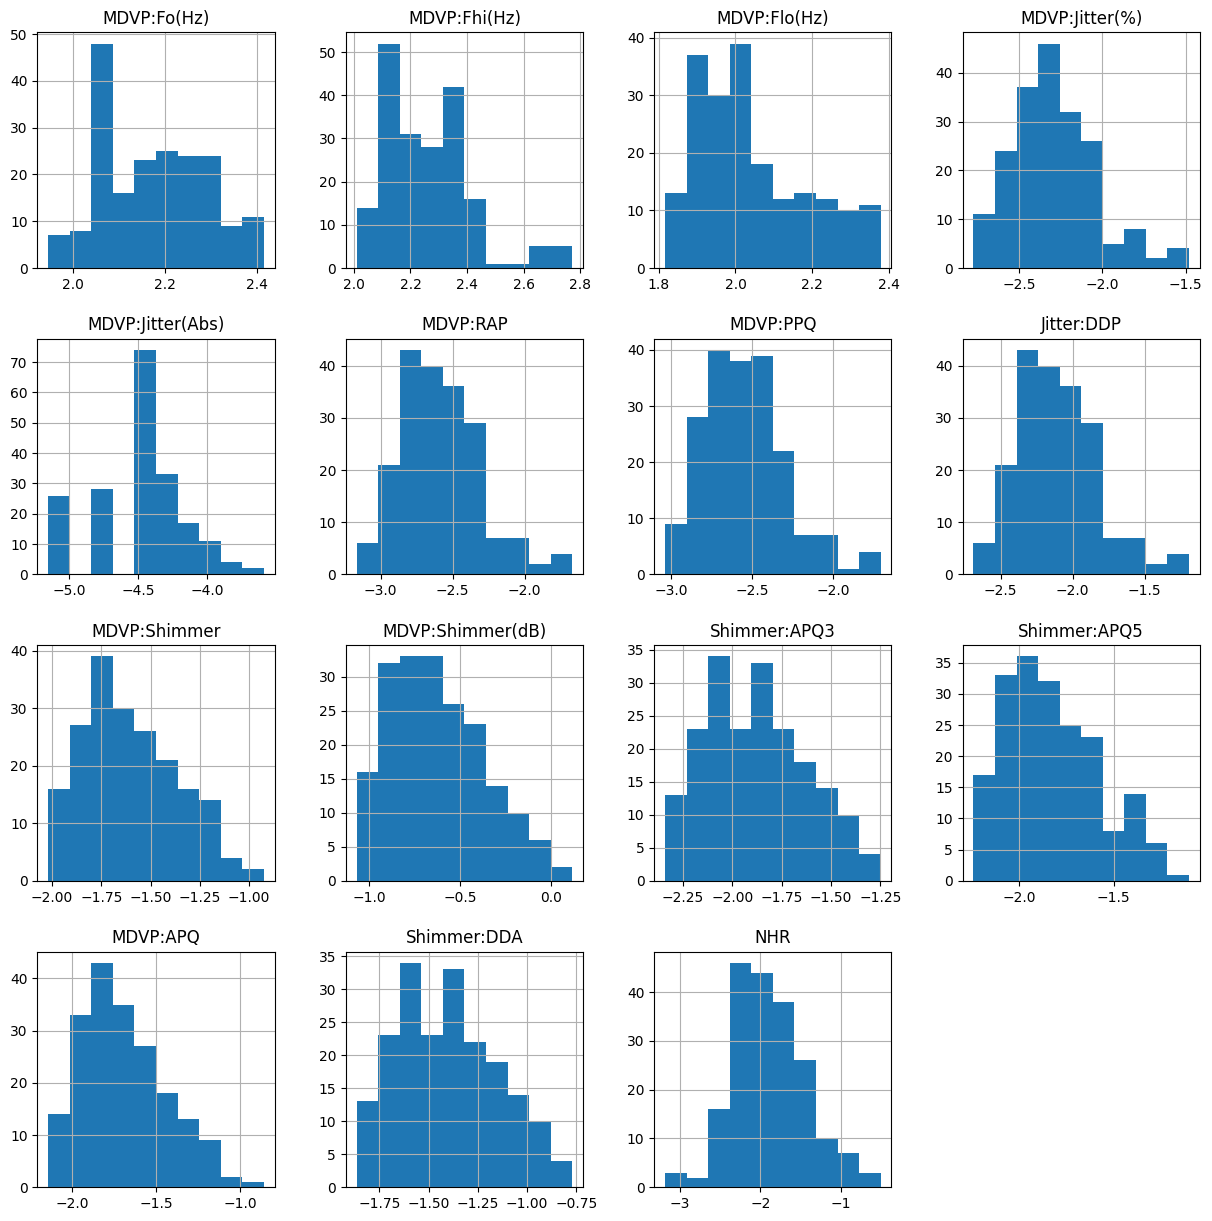

In [ ]:
parkinson.iloc[:,:15].hist(figsize=(15,15))
plt.title('after log transform')
plt.show()

<Axes: >

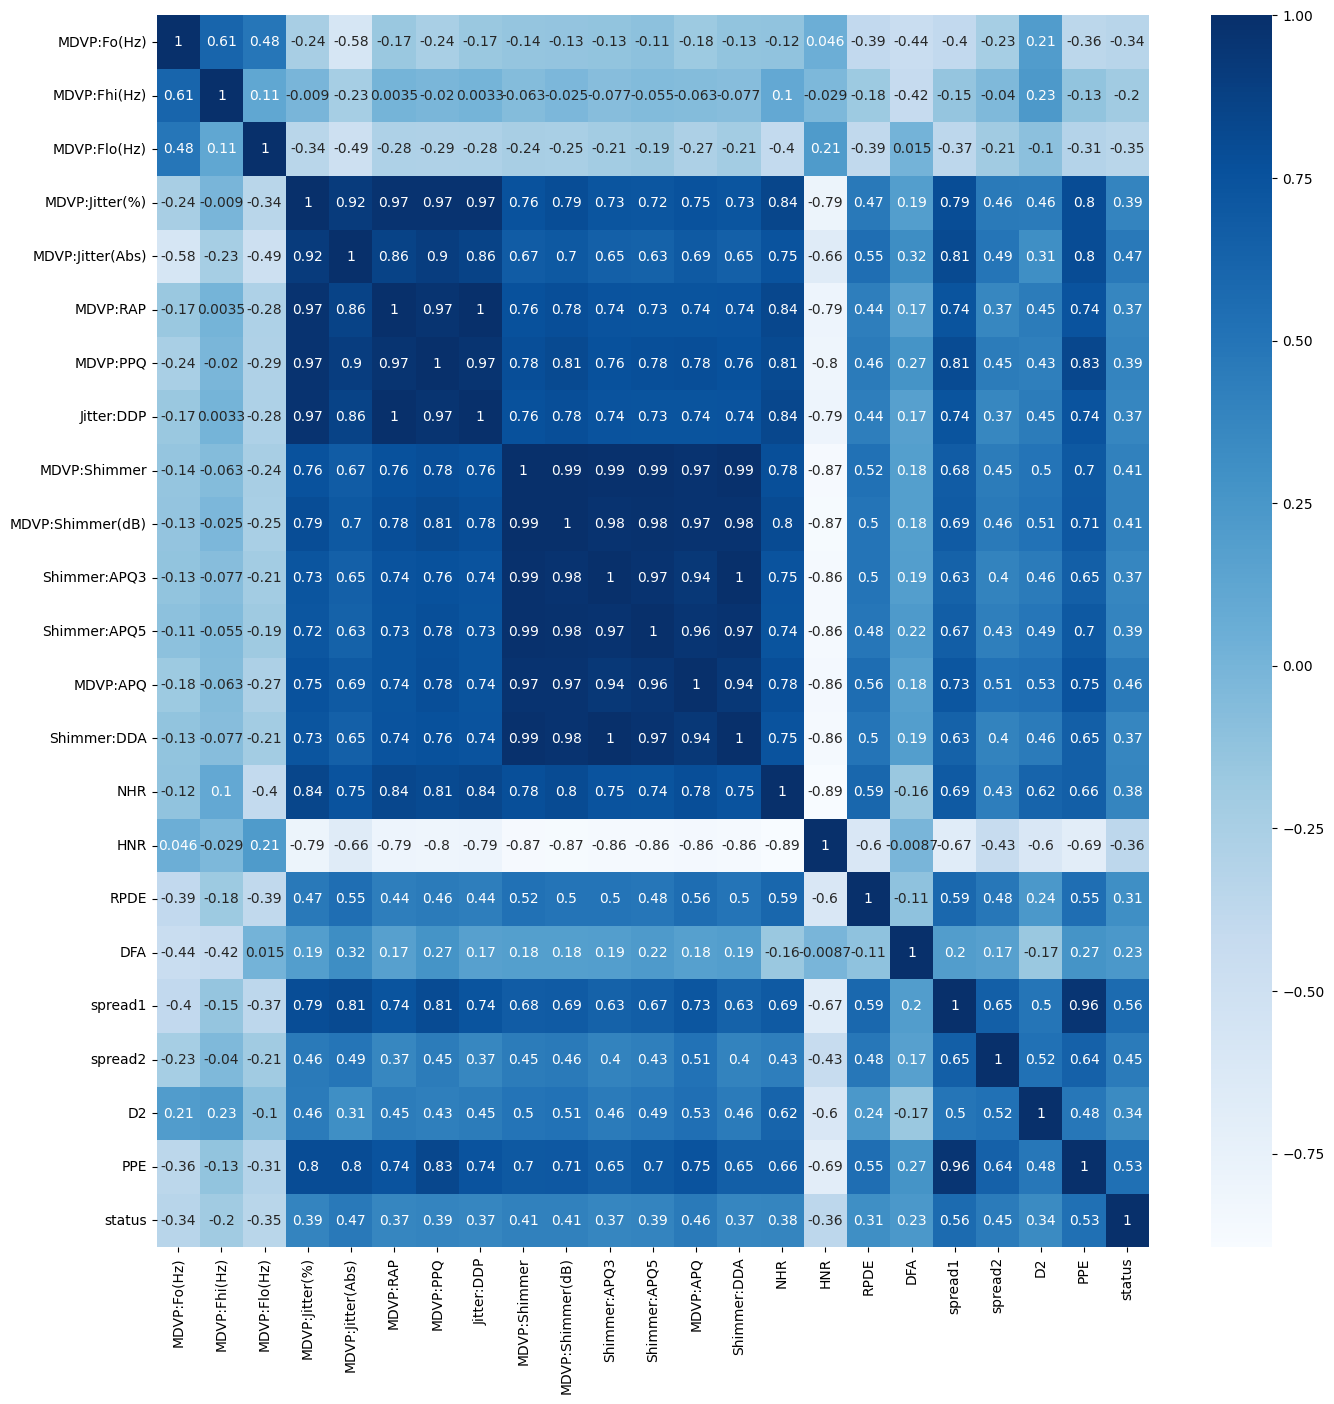

In [ ]:
# checking the correlation
plt.figure(figsize = (16,16))
corr_matrix = parkinson.corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'Blues')

### Notice that there are many features with high dependency that must be removed

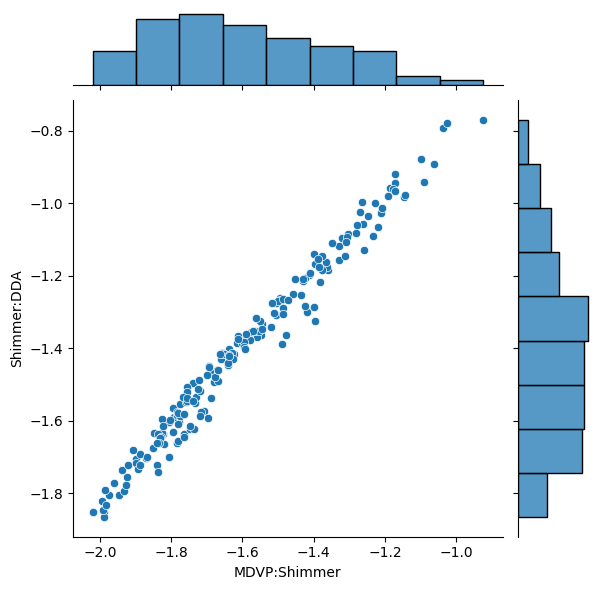

In [ ]:
# the highest correlated features
sns.jointplot(x = parkinson['MDVP:Shimmer'], y = parkinson['Shimmer:DDA'])

In [ ]:
# the features with correlation factor > 0.9
high_corr = ['MDVP:PPQ',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'MDVP:Shimmer',
 'MDVP:Jitter(%)',
 'MDVP:APQ',
 'Shimmer:DDA',
 'MDVP:RAP',
 'PPE']

In [ ]:
# removing the highly dependent features
park = parkinson.drop(high_corr, axis = 1)
park

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(Abs),Jitter:DDP,Shimmer:APQ5,NHR,HNR,RPDE,DFA,spread1,spread2,D2,status
0,2.079152,2.196734,1.875044,-4.154902,-1.955068,-1.504456,-1.655411,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,1
1,2.087781,2.172165,2.056215,-4.096910,-1.855737,-1.345054,-1.714668,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,1
2,2.067004,2.117639,2.047489,-4.045757,-1.787014,-1.413638,-1.883060,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,1
3,2.066982,2.139473,2.046753,-4.045757,-1.822464,-1.397397,-1.868702,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,1
4,2.064510,2.151618,2.043971,-3.958607,-1.706416,-1.316503,-1.752763,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2.241018,2.363571,1.974332,-4.522879,-2.102373,-1.602408,-1.558462,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0
191,2.321217,2.403150,1.951765,-4.522879,-2.002614,-1.780677,-1.742321,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0
192,2.242263,2.380220,1.870913,-4.096910,-1.727462,-1.864867,-0.970008,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0
193,2.298338,2.598748,1.874505,-4.397940,-1.955068,-1.879097,-1.141282,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0


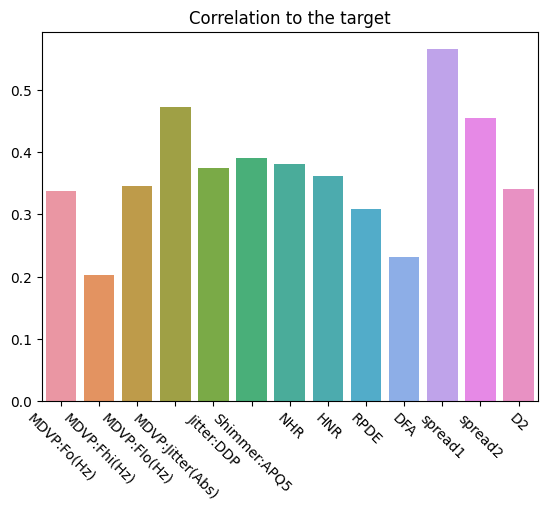

In [ ]:
corr_target = abs(park.corr()['status'])
sns.barplot(x = corr_target[:-1].index, y = corr_target[:-1].values)
plt.xticks(rotation = -45)
plt.title('Correlation to the target')
plt.show()

In [ ]:
#plt.figure(figsize = (20,20))
#sns.pairplot(data = park, hue = 'status')
#plt.show()

# Data split

In [ ]:
x = park.drop('status', axis = 1)
y = park.iloc[:,-1]

### Checking balance of the data

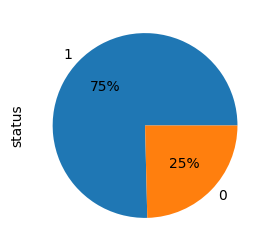

In [ ]:
plt.figure(figsize = (3,3))
parkinson['status'].value_counts().plot(kind='pie', autopct = "%1.0f%%")
plt.show()

The data is highly imbalanced and the positive class is the majority class

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.3,stratify = y,random_state = 42)
x_valid, x_test, y_valid, y_test = train_test_split(x_test,y_test,test_size =0.5,stratify = y_test, random_state = 42)

In [ ]:
print(f'Train set: {x_train.shape}')
print(f'Validation set: {x_valid.shape}')
print(f'Test set: {x_test.shape}')

Train set: (136, 13)
Validation set: (29, 13)
Test set: (30, 13)


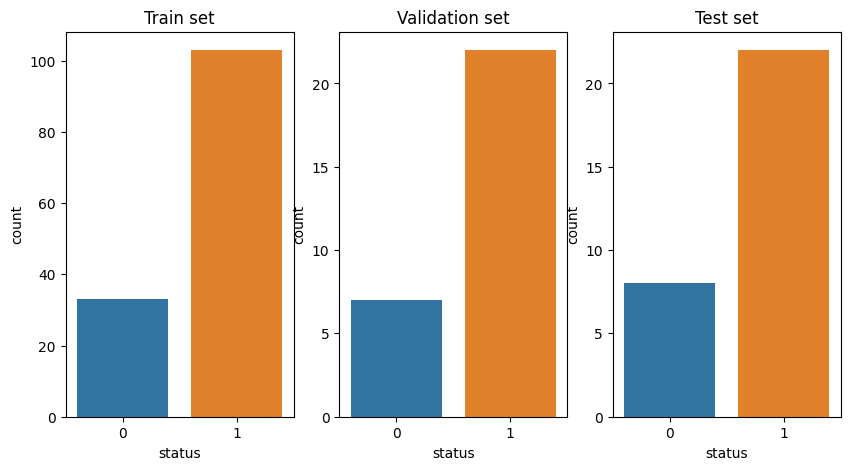

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.countplot(x = y_train)
plt.title('Train set')
plt.subplot(1,3,2)
sns.countplot(x = y_valid)
plt.title('Validation set')
plt.subplot(1,3,3)
sns.countplot(x = y_test)
plt.title('Test set')
plt.show()

# Data Prerocessing

In [ ]:
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

## Oversampling

In [ ]:
smote = SMOTE(sampling_strategy='minority', k_neighbors=5)

x_train, y_train = smote.fit_resample(x_train, y_train)
x_valid, y_valid = smote.fit_resample(x_valid, y_valid)
x_test, y_test = smote.fit_resample(x_test, y_test)

print('Resampled Train set distribution:', Counter(y_train))
print('Resampled Vlidation set distribution:', Counter(y_valid))
print('Resampled Test set distribution:', Counter(y_test))

Resampled Train set distribution: Counter({0: 103, 1: 103})
Resampled Vlidation set distribution: Counter({0: 22, 1: 22})
Resampled Test set distribution: Counter({0: 22, 1: 22})


# Training

## Training different classifiers

In [ ]:
classifiers = ['LinearSVM', 'RadialSVM',
               'Logistic',  'RandomForest',
               'AdaBoost',  'DecisionTree',
               'KNeighbors','GradientBoosting']

models = [SVC(kernel='linear',random_state=42),
          SVC(kernel='rbf',random_state=42),
          LogisticRegression(random_state=42),
          RandomForestClassifier(random_state=42),
          AdaBoostClassifier(random_state = 42),
          DecisionTreeClassifier(random_state=42),
          KNeighborsClassifier(),
          GradientBoostingClassifier(random_state=42)]

In [ ]:
# evaluation function
def metrics_(model_name, actual, prediction):
    Accuracy = accuracy_score(actual, prediction)
    Recall = recall_score(actual, prediction)
    Precision = precision_score(actual, prediction)
    F1score = f1_score(actual, prediction)
    model_name = model_name
    return model_name, Accuracy, Recall, Precision, F1score

In [ ]:
all_features = []
for i, model_name in enumerate(classifiers):
    model = models[i]
    model.fit(x_train, y_train)
    y_pred = model.predict(x_valid)
    all_features += [metrics_(model_name, y_valid, y_pred)]

all_features = pd.DataFrame(all_features)
all_features.columns = ['model','Accuracy','Recall','Precision','F1 score']

In [ ]:
# function to highlight the best results
def highlight_max(s):
    if s.dtype == np.object:
        is_max = [False for _ in range(s.shape[0])]
    else:
        is_max = s == s.max()
    return ['background: blue' if cell else '' for cell in is_max]

all_features.style.apply(highlight_max)

<ipython-input-387-7575a8e3abdb>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if s.dtype == np.object:


,model,Accuracy,Recall,Precision,F1 score
0,LinearSVM,0.818182,0.681818,0.937500,0.789474
1,RadialSVM,0.863636,0.818182,0.900000,0.857143
2,Logistic,0.818182,0.681818,0.937500,0.789474
3,RandomForest,0.931818,0.954545,0.913043,0.933333
4,AdaBoost,0.886364,0.954545,0.840000,0.893617
5,DecisionTree,0.840909,0.954545,0.777778,0.857143
6,KNeighbors,0.886364,0.863636,0.904762,0.883721
7,GradientBoosting,0.909091,0.954545,0.875000,0.913043


## Feature selection using ANOVA

In [ ]:
x_all = parkinson.drop('status', axis = 1)
y_all = parkinson.iloc[:,-1]

In [ ]:
x_train_all, x_test_all, y_train_all, y_test_all = train_test_split(x_all,y_all,test_size =0.3,stratify = y_all, random_state = 42)
x_valid_all, x_test_all, y_valid_all, y_test_all = train_test_split(x_test_all,y_test_all,test_size =0.5,stratify = y_test_all, random_state = 42)

In [ ]:
fsm=SelectKBest(f_classif,k=13)
fsm.fit(x_train_all ,y_train_all)

x_train_selected=fsm.transform(x_train_all)
x_valid_selected=fsm.transform(x_valid_all)
x_test_selected=fsm.transform(x_test_all)

In [ ]:
mask = fsm.get_support()

In [ ]:
selected_feature_names = pd.DataFrame(x_train_all).columns[mask]
selected_feature_names

Index(['MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'spread1', 'PPE'],
      dtype='object')

In [ ]:
feature_select = []
for i, model_name in enumerate(classifiers):
    model = models[i]
    model.fit(x_train_selected, y_train_all)
    y_pred_all = model.predict(x_valid_selected)
    feature_select += [metrics_(model_name, y_valid_all, y_pred_all)]

feature_select = pd.DataFrame(feature_select)
feature_select.columns = ['Model','Accuracy','Recall','Precision','F1 score']
feature_select.style.apply(highlight_max)

<ipython-input-237-7575a8e3abdb>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if s.dtype == np.object:


,Model,Accuracy,Recall,Precision,F1 score
0,LinearSVM,0.793103,0.772727,0.944444,0.850000
1,RadialSVM,0.827586,0.863636,0.904762,0.883721
2,Logistic,0.827586,0.818182,0.947368,0.878049
3,RandomForest,0.827586,0.818182,0.947368,0.878049
4,AdaBoost,0.793103,0.772727,0.944444,0.850000
5,DecisionTree,0.862069,0.863636,0.950000,0.904762
6,KNeighbors,0.827586,0.818182,0.947368,0.878049
7,GradientBoosting,0.862069,0.863636,0.950000,0.904762


## Hyperparamater tuning

In [ ]:
params = {
    'loss' : ['log_loss', 'deviance', 'exponential'],
    'learning_rate' : [0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
    'max_depth' : [3, 5, 10, 15],
    'n_estimators' : [10, 50, 100, 200, 250]
}
gs = GridSearchCV(estimator = GradientBoostingClassifier(random_state=42), param_grid = params , cv=5, n_jobs=-1, scoring='accuracy').fit(x_train_selected, y_train)

In [ ]:
# Best performing model and its corresponding hyperparameters
gs.best_params_

{'ccp_alpha': 0,
 'learning_rate': 0.7,
 'max_depth': 10,
 'max_features': 2,
 'n_estimators': 10}

In [ ]:
# accuracy score for the best model
gs.best_score_

0.9709639953542393

# Building model with best parameters

In [ ]:
final_model = gs.best_estimator_

GradientBoostingClassifier(ccp_alpha=0, learning_rate=0.7, max_depth=10,
                           max_features=2, n_estimators=10, random_state=42)

In [ ]:
final_model.fit(x_train_selected,y_train)
test_pred = final_model.predict(x_test_selected)

# Model Evaluation

In [ ]:
columns = ['Model','Accuracy','Recall','Precision','F1 score']
pd.DataFrame([columns, metrics_('Gradient Boosting', y_test, test_pred)])

,0,1,2,3,4
0,Model,Accuracy,Recall,Precision,F1 score
1,Gradient Boosting,0.795455,1.0,0.709677,0.830189


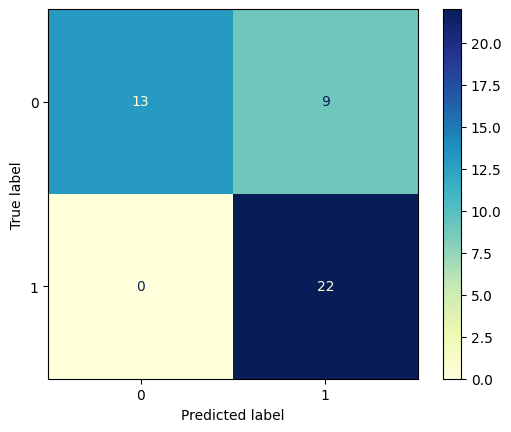

In [ ]:
cm = confusion_matrix(y_test, test_pred, labels = final_model.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=final_model.classes_).plot(cmap = 'YlGnBu')

# Conclusion
- Boosting algorithms had the best performance (Gradient boosting, Adaboost)

- Applying Feature Selection significantly reduced overfitting
